In [9]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [20]:
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
print(iris)
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [21]:
# importing the Forest Types Training Dataset
df = pd.read_csv('../forest2.csv') #Dataframe for training.csv

#Extract the training targets
y_df = df[['class']]
y=y_df.values
y=y.reshape(-1)
print(type(y),"Y:",y.shape)
#print(y)

#Extract the training data
df.drop(['class'],1,inplace=True)
X = df.values

print(type(X),"X:",X.shape)
#print(X)

estimators = [('k_means_fores_8', KMeans(n_clusters=8)),
              ('k_means_fores_3', KMeans(n_clusters=3)),
              ('k_means_fores_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

<class 'numpy.ndarray'> Y: (98,)
<class 'numpy.ndarray'> X: (98, 27)


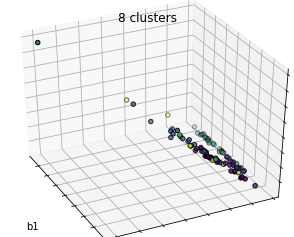

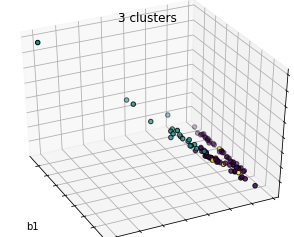

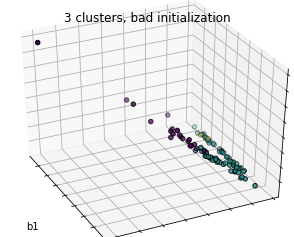

In [42]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=34, azim=154)
    est.fit(X)
    labels = est.labels_
    
    # Plot b1 b2 b3
    ax.scatter(X[:, 0], X[:, 1], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('b1')
    ax.set_ylabel('b2')
    ax.set_zlabel('b3')
    ax.set_title(titles[fignum - 1])
    ax.dist = 8
    fignum = fignum + 1

In [46]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=34, azim=154)

for name, label in [('0', 0),
                    ('1', 1),
                    ('2', 2),
                    ('3', 3)]:
    #print(X[y == label, 3].mean())
    print(X[y == label, 3])
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('b1')
ax.set_ylabel('b2')
ax.set_zlabel('b3')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

[ 90. 116.  98.  64. 108. 124. 106.  92.  90. 101.  54.  96.  99.  93.
  97. 172. 111.  98.  93. 152.   1. 117. 144. 131.  97.]
[ 91. 103.  82.  97.  95.  91.  91. 102. 108.  78. 105. 108. 105.  80.
  83.  77. 114. 105.  97. 115.  81.  88.  94.  92. 103.  88.  79. 115.
 107. 106.   1.  94.]
[112. 120. 114. 110. 109. 111. 117. 112. 126. 104. 118. 107. 118. 119.
 118. 108. 111. 102. 114.]
[ 99. 103.  93.  95.  93.  92.  86.  96. 104.  92.  87. 113.  80.  98.
  87.  85.  95.  95. 119.  97. 101.   1.]


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'